In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.transforms as transforms
# import matplotlib
from matplotlib import gridspec
from scipy import cluster
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, fclusterdata, leaves_list, cophenet
from scipy.spatial.distance import pdist
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (7, 5)
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


colors: http://colorbrewer2.org/#type=sequential&scheme=Greys&n=8

# example 2D hierachical clustering and visualization code

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [8]:
df1 = pd.DataFrame(np.random.randint(1,10,size=(10,5)), columns=list('abcde'))
df2 = pd.DataFrame(100+np.random.randint(1,10,size=(10,5)), columns=list('abcde'))
df = pd.concat([df1,df2])
df = df.reset_index(drop=True)
df3 = df+100
df4 = pd.merge(df, df3, left_index=True, right_index=True)
df4.head(2)
df4.tail(2)
df4.shape

,a_x,b_x,c_x,d_x,e_x,a_y,b_y,c_y,d_y,e_y
0,3,7,3,8,9,103,107,103,108,109
1,8,1,8,4,4,108,101,108,104,104


,a_x,b_x,c_x,d_x,e_x,a_y,b_y,c_y,d_y,e_y
18,106,102,102,103,102,206,202,202,203,202
19,102,109,108,108,102,202,209,208,208,202


(20, 10)

array([[12. , 13. ,  0.4,  2. ],
       [ 0. ,  5. ,  0.6,  2. ],
       [ 1. ,  8. ,  0.6,  2. ],
       [ 2. ,  7. ,  0.6,  2. ],
       [ 3. , 23. ,  0.6,  3. ],
       [11. , 19. ,  0.6,  2. ],
       [17. , 18. ,  0.6,  2. ],
       [21. , 22. ,  0.8,  4. ],
       [24. , 27. ,  0.8,  7. ],
       [ 4. , 28. ,  0.8,  8. ],
       [ 6. , 29. ,  0.8,  9. ],
       [ 9. , 30. ,  0.8, 10. ],
       [10. , 14. ,  0.8,  2. ],
       [15. , 32. ,  0.8,  3. ],
       [25. , 33. ,  0.8,  5. ],
       [20. , 34. ,  0.8,  7. ],
       [16. , 35. ,  0.8,  8. ],
       [26. , 36. ,  0.8, 10. ],
       [31. , 37. ,  1. , 20. ]])

(19, 4)

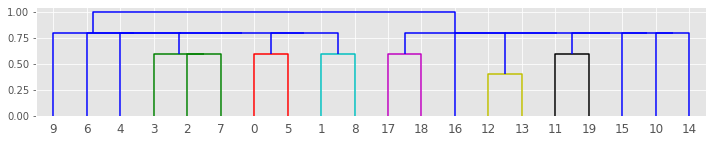

In [16]:
# cluster by rows
Z_rows = linkage(df4.values, metric='hamming')
Z_rows
Z_rows.shape
f, ax = plt.subplots(figsize=(12, 2))
_ = dendrogram(Z_rows, labels=df4.index.values)
# https://stackoverflow.com/questions/9838861/scipy-linkage-format
# point 16 and 19 close to form cluster 20,Within-Cluster Distance (WCD) of 0.4.last column is the number of datapoint clustered 
# point 0 and 1 closed to form cluster 21,
# point 3 and 8 close to form cluster 22,
# point 5 merged into newly formed cluster 22 to form cluster 23

Another thing you can and should definitely do is check the Cophenetic Correlation Coefficient of your clustering with help of the cophenet() function. This (very very briefly) compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances

In [11]:
c, coph_dists = cophenet(Z_rows, pdist(df4.values))
c

0.8960975487064936

array([[ 0.  ,  2.  ,  0.8 ,  2.  ],
       [ 5.  ,  7.  ,  0.8 ,  2.  ],
       [ 1.  , 10.  ,  0.85,  3.  ],
       [ 3.  , 12.  ,  0.85,  4.  ],
       [ 6.  , 11.  ,  0.85,  3.  ],
       [ 8.  , 14.  ,  0.85,  4.  ],
       [ 4.  , 13.  ,  0.9 ,  5.  ],
       [ 9.  , 15.  ,  0.9 ,  5.  ],
       [16.  , 17.  ,  1.  , 10.  ]])

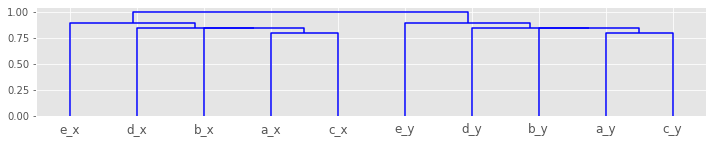

In [17]:
# cluster by columns
Z_columns = linkage(df4.T.values, metric='hamming')
Z_columns
f, ax = plt.subplots(figsize=(12, 2))
_ = dendrogram(Z_columns, labels=df4.T.index.values)

In [19]:
df4.head(2)

,a_x,b_x,c_x,d_x,e_x,a_y,b_y,c_y,d_y,e_y
0,3,7,3,8,9,103,107,103,108,109
1,8,1,8,4,4,108,101,108,104,104


In [22]:
# reorder rows and columns based on the cluster linkage order
x_idxes = leaves_list(Z_rows)
x_idxes = list(reversed(x_idxes)) # reverse a list
y_idxes = leaves_list(Z_columns)

In [24]:
x_idxes
y_idxes

[14, 10, 15, 19, 11, 13, 12, 16, 18, 17, 8, 1, 5, 0, 7, 2, 3, 4, 6, 9]

array([4, 3, 1, 0, 2, 9, 8, 6, 5, 7], dtype=int32)

In [30]:
# df = df4.ix[x_idxes][y_idxes]
df = df4.iloc[x_idxes, y_idxes]
df.head(2)

,e_x,d_x,b_x,a_x,c_x,e_y,d_y,b_y,a_y,c_y
14,104,102,107,106,109,204,202,207,206,209
10,102,105,107,103,106,202,205,207,203,206


[]

[]

[]

[]

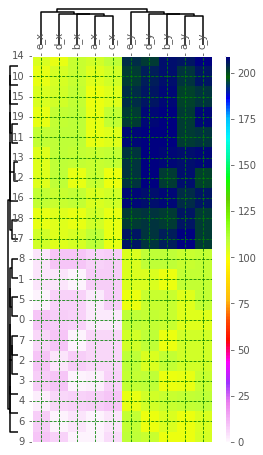

In [36]:
fig = plt.figure(figsize=(4, 8), facecolor='white')

gs = gridspec.GridSpec(2, 3, height_ratios=[1,10], width_ratios=[1, 16, 0.5], 
                       wspace=0.2, # horizontal space
                       hspace=0.05  # vertical space
                      )

X_ax = fig.add_subplot(gs[1])
col_func = lambda x: 'black'
_ = dendrogram(Z_columns, ax=X_ax,  leaf_font_size=10, link_color_func=col_func, labels=df4.columns.values)
X_ax.set_frame_on(False)
X_ax.axes.get_yaxis().set_visible(False)

Y_ax = fig.add_subplot(gs[3])
_ = dendrogram(Z_rows, ax=Y_ax, orientation='left', labels=df4.index.values,  link_color_func=col_func)
Y_ax.set_frame_on(False)
Y_ax.axes.get_xaxis().set_visible(False)

ax_mut = fig.add_subplot(gs[4])
ax_mut.xaxis.tick_top()
im = ax_mut.imshow(df.values,
#                    origin='lower',
                   interpolation='none',
#                    extent=list(Y_ax.get_xlim()) + list(X_ax.get_ylim()),
                   aspect='auto',
                   cmap='gist_ncar_r', 
                   vmin=0, vmax=df.values.max())

xtick_labels = df.columns.values.tolist()
ytick_labels = df.index.values.tolist()

# ticklabels follow major ticks
_ = ax_mut.set_xticks(np.arange(len(xtick_labels)), minor=False)
_ = ax_mut.set_yticks(np.arange(len(ytick_labels)), minor=False)
ax_mut.minorticks_off()

_ = ax_mut.set_xticklabels(xtick_labels, rotation=90, ha='center')
_ = ax_mut.set_yticklabels(ytick_labels, va='center')

Y_ax.set_xticklabels([])
Y_ax.set_yticklabels([])
X_ax.set_xticklabels([])
X_ax.set_yticklabels([])

ax_mut.grid(color='green', which='major', linestyle='--')
# ax_mut.grid(False)

ax_leg = fig.add_subplot(gs[5])
ax_leg.set_frame_on(False)
# ax_leg.set_axis_off()
cb = fig.colorbar(im, cax=ax_leg)

for ax in [Y_ax, X_ax, ax_mut, ax_leg]:
    ax.patch.set_facecolor('white')
    ax.patch.set_alpha(1)

# # plt.savefig('./candidate_genes_mutational_profile_{0}.jpg'.format(char_code), 
# #             dpi=200, bbox_inches='tight')

# another example of clustering

In [37]:
import sklearn.datasets
X, y = sklearn.datasets.make_blobs(n_samples=10,
                  cluster_std=2.5,
                  random_state=77)

In [38]:
X

array([[  9.54837905,  -2.09286075],
       [  9.14690493,   5.75376739],
       [ 12.3031729 ,   1.03192444],
       [  9.07105067,  -1.09560093],
       [ -8.52559273,   4.01758113],
       [ -8.43839071,   5.35880273],
       [  1.85895634,  -7.68661259],
       [  3.47661761,  -2.97013556],
       [-10.76813606,   4.77867854],
       [  2.45150612,  -9.65515365]])

In [39]:
y

array([0, 0, 0, 0, 2, 2, 1, 1, 2, 1])

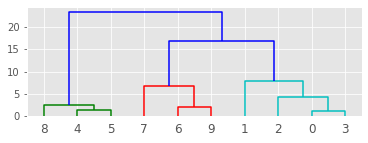

In [44]:
f, ax = plt.subplots(figsize=(6, 2))
Z = cluster.hierarchy.linkage(X, "complete")
cluster.hierarchy.dendrogram(Z);

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [43.75, 43.75, 82.5, 82.5],
  [12.5, 12.5, 63.125, 63.125]],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 9.064933036736789e-17, 9.064933036736789e-17, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 9.064933036736789e-17, 9.064933036736789e-17, 0.0],
  [0.0, 1.7470376089555441e-16, 1.7470376089555441e-16, 9.064933036736789e-17],
  [9.064933036736789e-17,
   4.098780306383839,
   4.098780306383839,
   1.7470376089555441e-16]],
 'ivl': ['8', '4', '5', '9', '2', '0', '1', '7', '3', '6'],
 'leaves': [8, 4, 5, 9, 2, 0, 1, 7, 3, 6],
 'color_list': ['g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'b']}

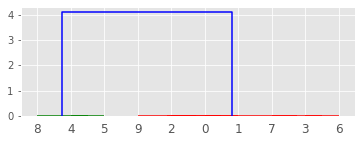

In [47]:
f, ax = plt.subplots(figsize=(6, 2))
dist='correlation'
link='ward'
Z = linkage(pdist(X, dist), link)
dendrogram(Z)